In [58]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [59]:
mnist = tf.keras.datasets.mnist
(train_images, _), (test_images, _) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 1s 0us/step


In [60]:
input_img = tf.keras.Input(shape=(28, 28, 1))

# Енкодер
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Декодер
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [61]:
autoencoder.fit(train_images, train_images, epochs=10, batch_size=128, shuffle=True, validation_data=(test_images, test_images))

Epoch 1/10
469/469 [==============================] - 70s 145ms/step - loss: 0.2250 - val_loss: 0.1431
Epoch 2/10
469/469 [==============================] - 68s 145ms/step - loss: 0.1335 - val_loss: 0.1250
Epoch 3/10
469/469 [==============================] - 66s 140ms/step - loss: 0.1211 - val_loss: 0.1158
Epoch 4/10
469/469 [==============================] - 66s 141ms/step - loss: 0.1147 - val_loss: 0.1116
Epoch 5/10
469/469 [==============================] - 66s 141ms/step - loss: 0.1110 - val_loss: 0.1088
Epoch 6/10
469/469 [==============================] - 66s 140ms/step - loss: 0.1086 - val_loss: 0.1066
Epoch 7/10
469/469 [==============================] - 68s 146ms/step - loss: 0.1068 - val_loss: 0.1054
Epoch 8/10
469/469 [==============================] - 66s 140ms/step - loss: 0.1054 - val_loss: 0.1038
Epoch 9/10
469/469 [==============================] - 65s 139ms/step - loss: 0.1043 - val_loss: 0.1027
Epoch 10/10
469/469 [==============================] - 66s 140ms/step - l

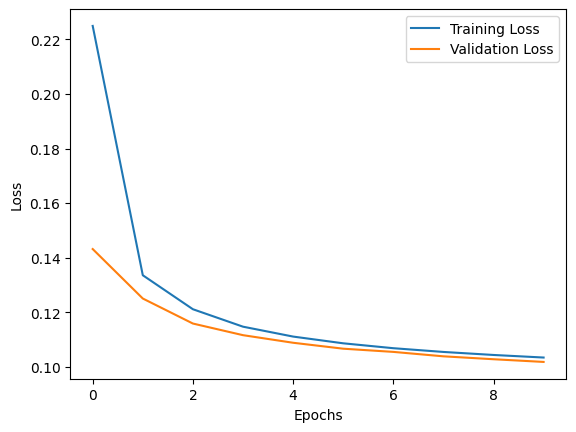

In [62]:
loss = autoencoder.history.history['loss']
val_loss = autoencoder.history.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 [==============================] - 4s 11ms/step


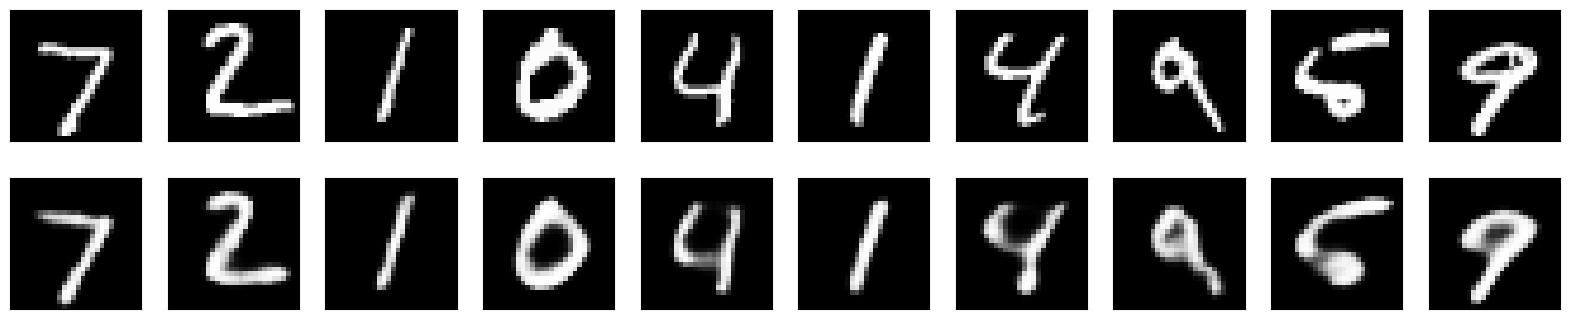

In [63]:
decoded_imgs = autoencoder.predict(test_images)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    #оригінальні зображення
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #відтворені зображення
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Висновок

Автокодувальник з багатошаровою нейронною мережею може ефективно кодувати та декодувати рукописні цифри з MNIST. Автокодувальник ефективно відновлює рукописні цифри з набору даних MNIST. Це вказує на те, що модель здатна ефективно відтворювати вхідні дані, що є ключовим для багатьох задач.